My ML Environments:

1. Pytorch standard: mlenv/
2. Jax
3. Jax - Metal
4. ANE

Path: /Volumes/code/envs/ + Env Folder name + /bin/python

In [8]:
# from datasets import load_dataset
import torch

In [9]:

# # Save the names to a file
# def saveNames():
#     ds = load_dataset("baby_names", data_files={'train': 'train/data-00000-of-00001.arrow', 'test': 'test/data-00000-of-00001.arrow'})
#     trainDS = ds["train"]
#     testDS = ds["test"]
#     names = trainDS["Names"] + testDS["Names"]
#     len(names)

#     # Save the names to a file
#     with open("namesLower.txt", "w") as f:
#         for name in names:
#             f.write(name.lower() + "\n")

# saveNames()

In [10]:
words = open('names.txt').read().splitlines()
len(words)

1356048

In [11]:
device  = "cpu"
if (device == "mps"):
  mps_device = torch.device("mps")
  N = torch.zeros(28, 28, dtype=torch.int32, device=mps_device)
elif (device == "cpu"):
  N = torch.zeros((27, 27), dtype=torch.int32, device="cpu")
elif (device == "acc"):
  accelerator = Accelerator()
  device = accelerator.device
  N = torch.zeros((27, 27), dtype=torch.int32).to(device)
elif (device == "coreml"):
  import coremltools as ct
  class SimpleModel(torch.nn.Module):
    def __init__(self, a,b):
      super(SimpleModel, self).__init__()
      self.fc = torch.nn.Linear(a,b)
      # Make the weights 0

    def addWeight(self, x, y):
      self.fc.weight.data[x][y] += 1

    def forward(self, x):
      return self.fc(x)
    
  model = SimpleModel(27, 27)
  # N = torch.zeros((27, 27), dtype=torch.int32, device="coreml")

### Bigram Language Model

Simple and Weak language model

In [12]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [14]:
# make 27*27 matrix
matrix = [[0]*27 for i in range(27)]

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # matrix[ix1][ix2] += 1
        N[ix1, ix2] +=1
     
     
# Update the tensor
for i in range(27):
    for j in range(27):
        N[i][j] = matrix[i][j]

# 50+

KeyboardInterrupt: 

In [ ]:
!uv pip install matplotlib

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

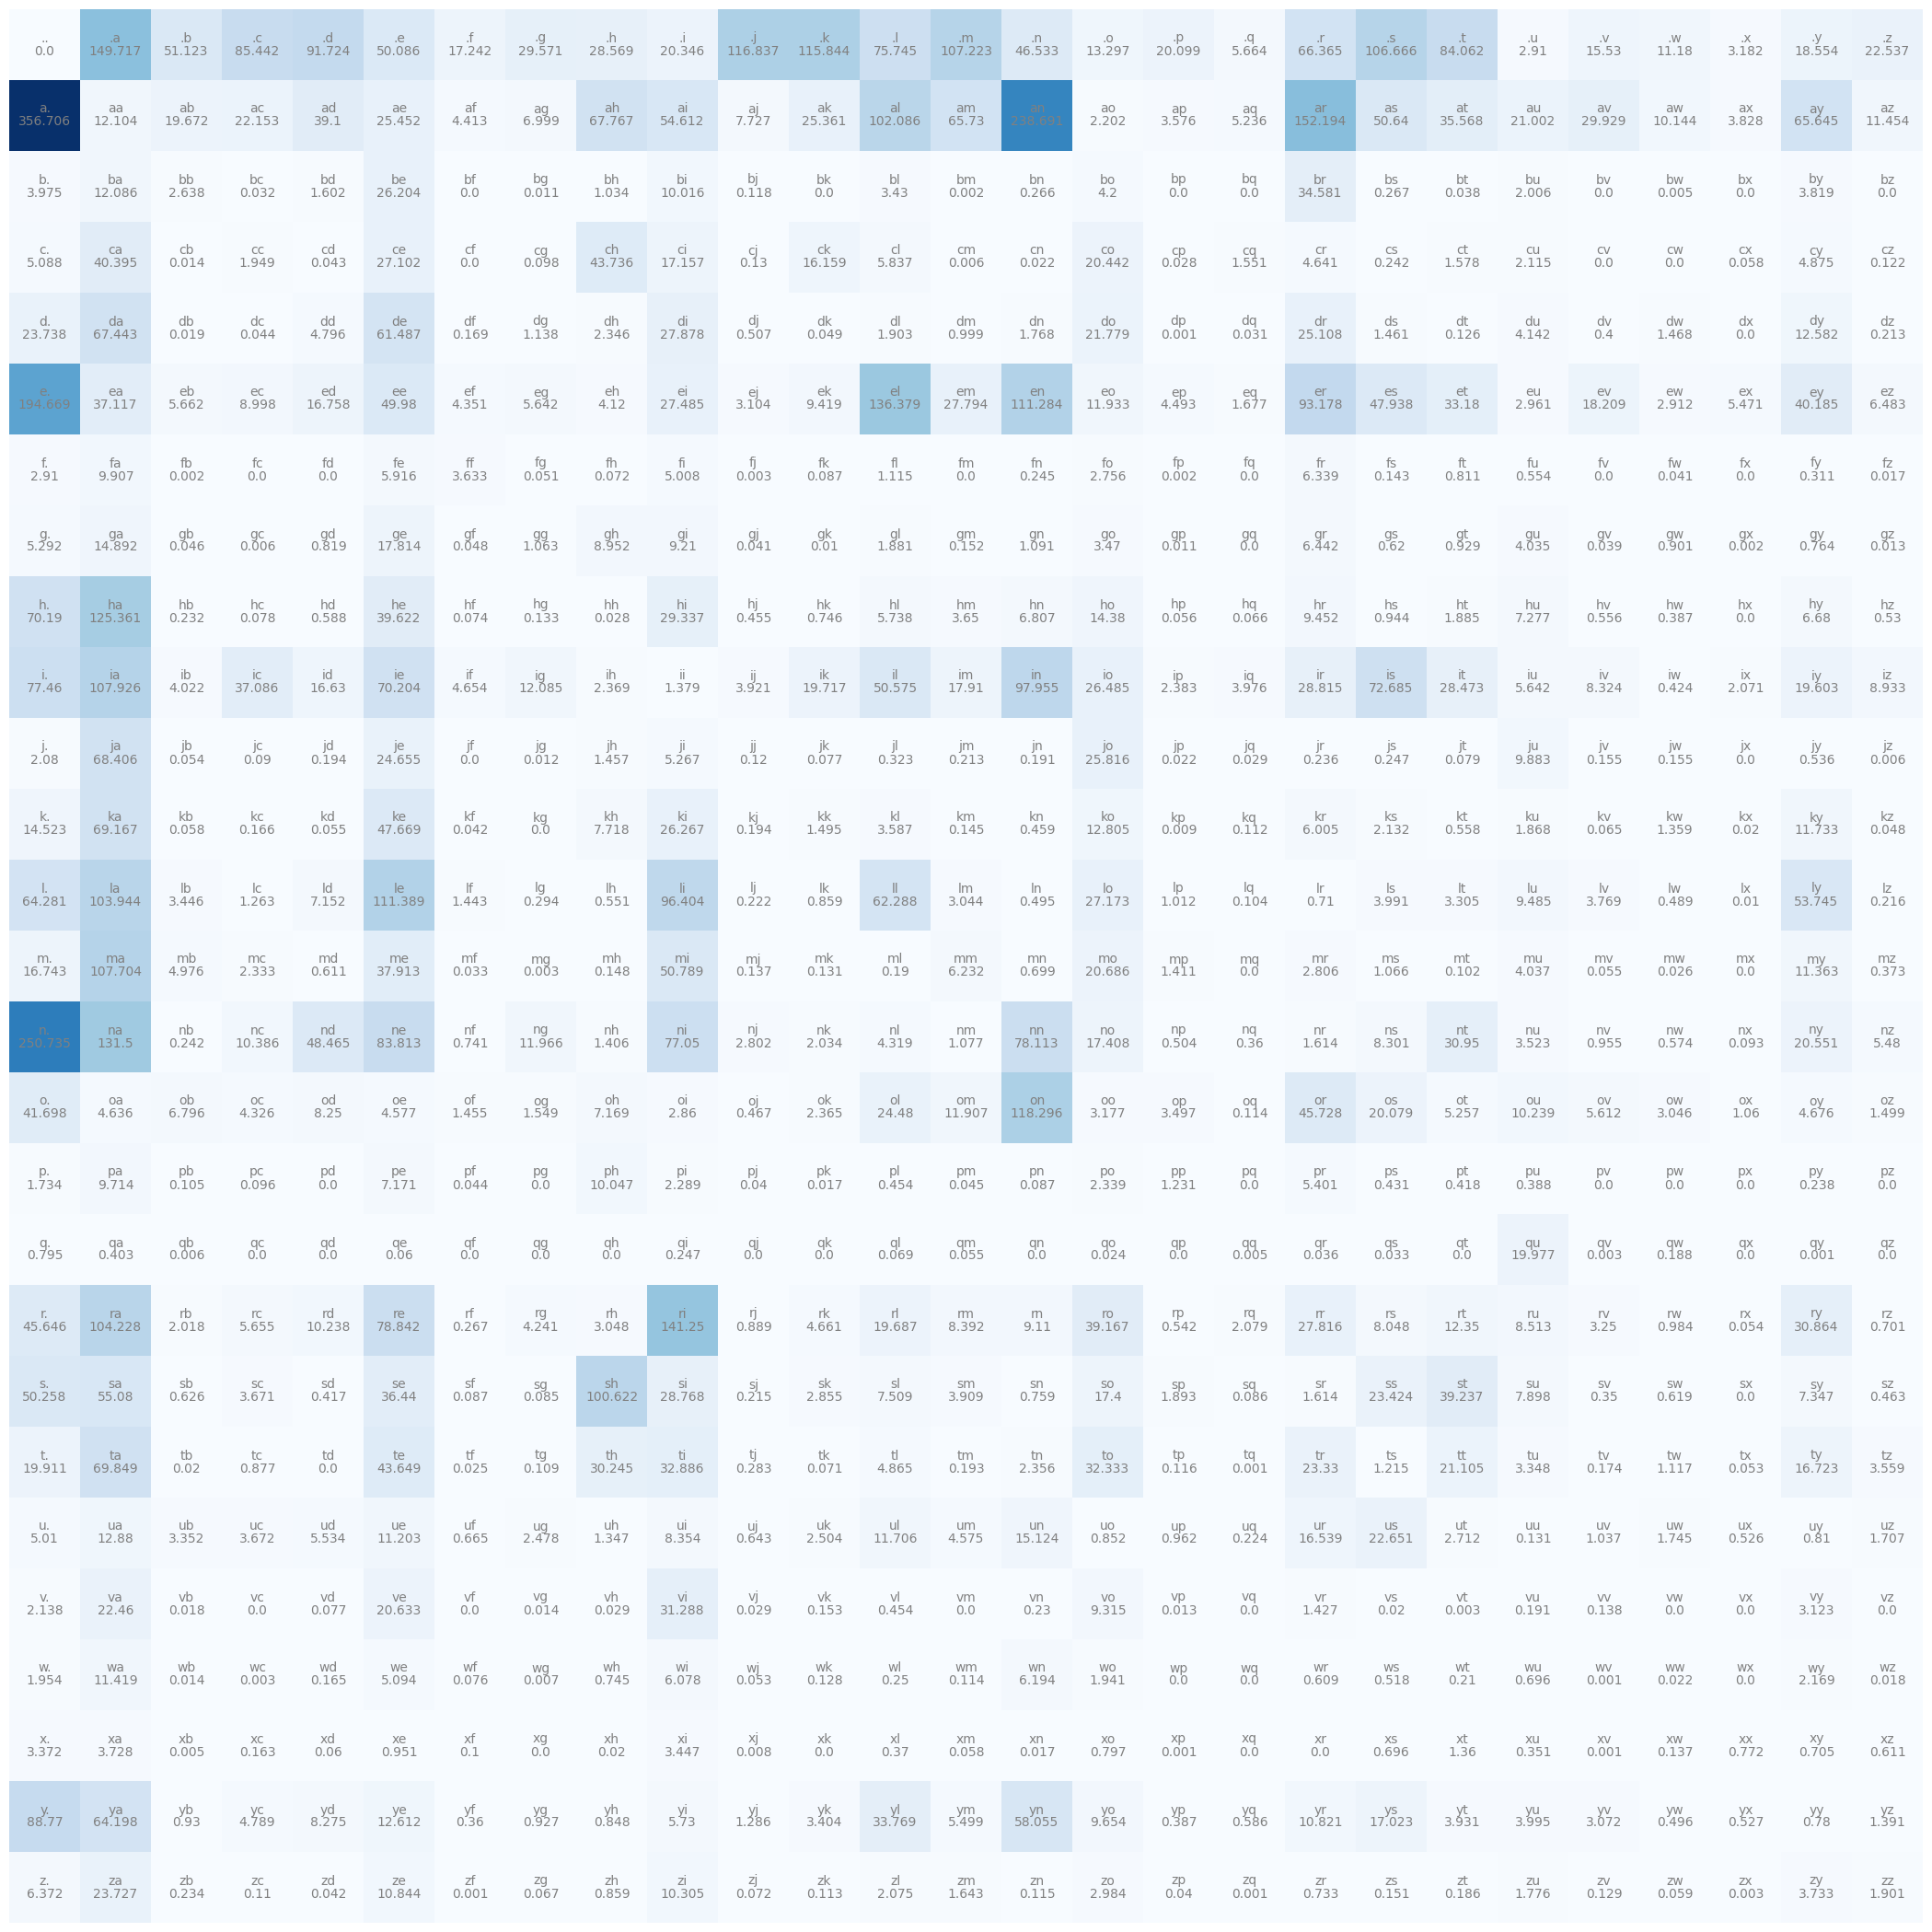

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(27,27))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center", va="bottom", color='gray')
        repeatTimes = round(N[i,j].item()/1000, 3)
        plt.text(j,i,repeatTimes, ha="center", va="top", color='gray')
plt.axis('off')

In [ ]:
rowSum = N.sum(axis=1, keepdims=True).float()
N = N.float() + 1
N /= rowSum
N

tensor([[7.3744e-07, 1.1041e-01, 3.7701e-02, 6.3009e-02, 6.7641e-02, 3.6936e-02,
         1.2716e-02, 2.1807e-02, 2.1069e-02, 1.5005e-02, 8.6161e-02, 8.5428e-02,
         5.5858e-02, 7.9071e-02, 3.4316e-02, 9.8064e-03, 1.4822e-02, 4.1776e-03,
         4.8941e-02, 7.8660e-02, 6.1991e-02, 2.1467e-03, 1.1453e-02, 8.2453e-03,
         2.3473e-03, 1.3683e-02, 1.6620e-02],
        [2.4771e-01, 8.4063e-03, 1.3662e-02, 1.5385e-02, 2.7154e-02, 1.7676e-02,
         3.0653e-03, 4.8611e-03, 4.7061e-02, 3.7926e-02, 5.3667e-03, 1.7613e-02,
         7.0894e-02, 4.5647e-02, 1.6576e-01, 1.5299e-03, 2.4840e-03, 3.6368e-03,
         1.0569e-01, 3.5168e-02, 2.4701e-02, 1.4586e-02, 2.0785e-02, 7.0452e-03,
         2.6590e-03, 4.5588e-02, 7.9549e-03],
        [3.7393e-02, 1.1367e-01, 2.4819e-02, 3.1035e-04, 1.5076e-02, 2.4645e-01,
         9.4047e-06, 1.1286e-04, 9.7338e-03, 9.4207e-02, 1.1192e-03, 9.4047e-06,
         3.2267e-02, 2.8214e-05, 2.5111e-03, 3.9509e-02, 9.4047e-06, 9.4047e-06,
         3.2523e-

In [ ]:
# copy tensor N to matrix
for i in range(27):
    for j in range(27):
        matrix[i][j] = N[i][j].item()

In [ ]:
# python math module
import math

In [ ]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = matrix[ix1][ix2]
        logprob = math.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}->{ch2} : {logprob:.1f}')
print(f'log likelihood: {log_likelihood:.1f}')
print(f'negative log likelihood: {-log_likelihood:.1f}')
print(f'avergae negative log likelihood: {-log_likelihood/n:.1f}') # Lower the better

log likelihood: -23684384.0
negative log likelihood: 23684384.0
avergae negative log likelihood: 2.4


In [ ]:
seed = 2147483647

for i in range(10):
  ix = 0
  while True:
    gen = torch.manual_seed(seed)
    ix = torch.multinomial(N[ix], 1, replacement=True, generator=gen).item()
    print(itos[ix], end='')
    if ix == 0:
      break
  print()

mininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininininini

KeyboardInterrupt: 